In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Datasets/brc_dr_test.csv")

# Predictor features (all columns except 'quality')
X = data.drop(columns=['diagnosis'])

# Target feature ('quality' column)
y = data['diagnosis']

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.23780,0.26710,0.10150,0.3014,0.08750
1,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.23360,0.26870,0.17890,0.2551,0.06589
2,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.23940,0.37910,0.15140,0.2837,0.08019
3,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.24030,0.07370,0.2556,0.09359
4,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.21180,0.17970,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.1034,0.10170,0.06260,0.08216,0.2136,0.06710
281,10.510,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777
282,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,0.06322,...,10.76,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490
283,11.570,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,...,13.07,26.98,86.43,520.5,0.1249,0.19370,0.25600,0.06664,0.3035,0.08284


In [ ]:
y

0      B
1      M
2      M
3      B
4      B
      ..
280    B
281    B
282    B
283    B
284    B
Name: diagnosis, Length: 285, dtype: object

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Standardize the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Load the Wine dataset
#wine_data = load_wine()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add target class to the DataFrame
principal_df['target'] = y

# Display the DataFrame
principal_df


,PC1,PC2,target
0,-0.655392,0.556724,B
1,3.147300,-4.610005,M
2,1.636779,-1.206261,M
3,-0.936178,2.363140,B
4,-1.711552,2.386573,B
...,...,...,...
280,-3.087212,-2.233461,B
281,-3.371191,0.875580,B
282,-2.130943,1.757934,B
283,-1.988908,0.695317,B


In [ ]:
# Map class names to numeric values (1 and 2)
class_mapping = {'B': 1, 'M': 2}
principal_df['target'] = principal_df['target'].replace(class_mapping)
principal_df

,PC1,PC2,target
0,-0.655392,0.556724,1
1,3.147300,-4.610005,2
2,1.636779,-1.206261,2
3,-0.936178,2.363140,1
4,-1.711552,2.386573,1
...,...,...,...
280,-3.087212,-2.233461,1
281,-3.371191,0.875580,1
282,-2.130943,1.757934,1
283,-1.988908,0.695317,1


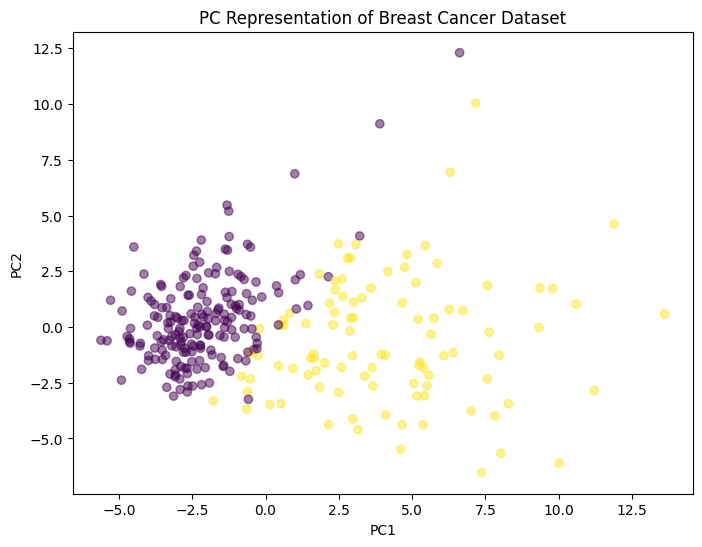

In [ ]:
import matplotlib.pyplot as plt


# Plot encoded data
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['target'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC Representation of Breast Cancer Dataset')
plt.show()

In [ ]:
principal_df

,PC1,PC2,target
0,-0.655392,0.556724,1
1,3.147300,-4.610005,2
2,1.636779,-1.206261,2
3,-0.936178,2.363140,1
4,-1.711552,2.386573,1
...,...,...,...
280,-3.087212,-2.233461,1
281,-3.371191,0.875580,1
282,-2.130943,1.757934,1
283,-1.988908,0.695317,1


In [ ]:
# Save DataFrame to CSV file in Google Drive
principal_df.to_csv('/content/drive/My Drive/Datasets/pca2.csv', index=False)